# Predicting Earnings Per Share

For the purpose of this project, we will be predicting the Net Income of a company

One can then divide the NI by the number od shares outstanding to get the Earnings Per Share

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Company Level Data

In [2]:
comp_df = pd.read_csv('fundamentals_annual/shifted_data.csv', index_col='Unnamed: 0')
print(comp_df.columns)
comp_df.datadate = pd.to_datetime(comp_df.datadate).dt.year

comp_data = comp_df.drop(['fyear','fyr'], axis= 1)
comp_data.set_index('datadate', inplace= True)
comp_data

Index(['gvkey', 'datadate', 'fyear', 'fyr', 'acominc', 'act', 'ap', 'at', 'ch',
       'citotal', 'cshpri', 'dltt', 'dvt', 'ebit', 'ebitda', 'gp', 'icapt',
       'invt', 'lt', 'opeps', 'revt', 'seq', 'txdi', 'txp', 'txt', 'sic', 'ni',
       'pi', 'txpd'],
      dtype='object')


,gvkey,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
datadate,,,,,,,,,,,,,,,,,,,,,
2000,2080,1.0,136.0,20.0,346.0,3.0,3.0,11.0,45.0,9.0,...,1.0,367.0,249.0,1.0,0.0,4.0,2511,-3.0,15.0,1.0
2001,2080,3.0,98.0,15.0,301.0,5.0,3.0,11.0,7.0,9.0,...,0.0,305.0,234.0,-1.0,0.0,-2.0,2511,6.0,-4.0,1.0
2002,2080,1.0,102.0,17.0,290.0,1.0,3.0,11.0,3.0,9.0,...,0.0,323.0,229.0,2.0,0.0,2.0,2511,-1.0,9.0,0.0
2003,2080,2.0,100.0,15.0,280.0,15.0,3.0,11.0,0.0,9.0,...,0.0,316.0,220.0,-2.0,1.0,0.0,2511,8.0,4.0,-4.0
2004,2080,2.0,102.0,19.0,297.0,4.0,3.0,11.0,15.0,9.0,...,0.0,315.0,221.0,1.0,0.0,2.0,2511,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,271841,0.0,1090.0,105.0,1707.0,20.0,18.0,183.0,275.0,4.0,...,0.0,627.0,781.0,-5.0,25.0,1.0,1520,-358.0,19.0,1.0
2016,271841,0.0,1045.0,87.0,1601.0,9.0,-358.0,181.0,200.0,0.0,...,-2.0,302.0,592.0,27.0,15.0,30.0,1520,-257.0,-155.0,3.0
2017,271841,0.0,523.0,77.0,868.0,8.0,-257.0,13.0,161.0,0.0,...,-20.0,198.0,228.0,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0


In [3]:
# comp_data.drop(['acominc', 'act', 'citotal', 'txpd'], axis= 1, inplace= True)

_ni_ is the net income of the following year. i.e.: It is the dependent variable _(Y)_ that has to be predicted.

Our assumption is: the future _ni_, depends on, amongst other factors, the _ni(s)_ of the precious year.

Thus, we shall add some time shifted ni's.

In [4]:
comp_data['prev_ni'] = comp_data.groupby('gvkey')['ni'].shift(1)
comp_data['prev2_ni'] = comp_data.groupby('gvkey')['prev_ni'].shift(1)
comp_data['prev3_ni'] = comp_data.groupby('gvkey')['prev2_ni'].shift(1)
comp_data.dropna(subset=['prev_ni','prev2_ni','prev3_ni'], inplace= True)
# comp_data = comp_data.drop(['gvkey'], axis = 1)
comp_data

,gvkey,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,...,txdi,txp,txt,sic,ni,pi,txpd,prev_ni,prev2_ni,prev3_ni
datadate,,,,,,,,,,,,,,,,,,,,,
2003,2080,2.0,100.0,15.0,280.0,15.0,3.0,11.0,0.0,9.0,...,-2.0,1.0,0.0,2511,8.0,4.0,-4.0,-1.0,6.0,-3.0
2004,2080,2.0,102.0,19.0,297.0,4.0,3.0,11.0,15.0,9.0,...,1.0,0.0,2.0,2511,7.0,10.0,1.0,8.0,-1.0,6.0
2005,2080,2.0,103.0,19.0,308.0,7.0,7.0,11.0,19.0,9.0,...,-2.0,0.0,1.0,2511,5.0,9.0,1.0,7.0,8.0,-1.0
2006,2080,3.0,105.0,16.0,309.0,6.0,6.0,11.0,23.0,9.0,...,-2.0,0.0,1.0,2511,-10.0,6.0,3.0,5.0,7.0,8.0
2007,2080,1.0,111.0,26.0,310.0,3.0,-11.0,11.0,28.0,9.0,...,-3.0,0.0,-5.0,2511,-41.0,-14.0,1.0,-10.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,271841,0.0,1090.0,105.0,1707.0,20.0,18.0,183.0,275.0,4.0,...,-5.0,25.0,1.0,1520,-358.0,19.0,1.0,18.0,-17.0,367.0
2016,271841,0.0,1045.0,87.0,1601.0,9.0,-358.0,181.0,200.0,0.0,...,27.0,15.0,30.0,1520,-257.0,-155.0,3.0,-358.0,18.0,-17.0
2017,271841,0.0,523.0,77.0,868.0,8.0,-257.0,13.0,161.0,0.0,...,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0,-257.0,-358.0,18.0


## Treasury/Inflation Data

,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
caldt,,,,,,,,,,
2001,0.033705,0.040867,0.040302,0.076023,0.082663,0.086428,0.074351,0.044809,0.037786,0.015517
2002,0.163857,0.172186,0.146641,0.149588,0.131414,0.067811,0.034147,0.017951,0.016339,0.023769
2003,0.006738,0.024512,0.012763,0.026151,0.028316,0.019835,0.014680,0.011604,0.010182,0.018794
2004,0.087015,0.082811,0.051849,0.040793,0.023355,0.007544,0.006780,0.013080,0.012005,0.032557
2005,0.089353,0.076566,0.031030,0.017948,0.006416,0.015241,0.022705,0.030790,0.029633,0.034156


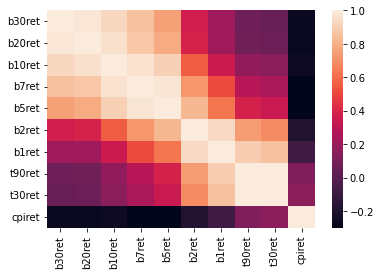

In [5]:
treasury_data = pd.read_csv('treasury_inflation/treasury_inflation.csv')
treasury_data.caldt = pd.to_datetime(treasury_data.caldt).dt.year
treasury_data.set_index('caldt', inplace = True)
sns.heatmap(treasury_data.corr())
treasury_data.head()

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def VIF(X = pd.DataFrame)->pd.Series:
    _ = add_constant(X)
    return pd.Series([variance_inflation_factor(_.values, i) for i in range(_.shape[1])], 
                index=_.columns)

VIF(treasury_data)

const        9.274778
b30ret      69.355949
b20ret     125.112504
b10ret     336.409002
b7ret      496.471951
b5ret      190.420014
b2ret      188.754629
b1ret      340.189724
t90ret    1850.180046
t30ret    1198.029684
cpiret       1.927737
dtype: float64

The returns on the bills are highly correlated.

Thus, taking all of them is redundant.

We will take one from each:
- short term _(t90ret)_
- long term _(b5ret)_

We also take the _cpiret_ (Inflation rate)

,t90ret,b5ret,cpiret
caldt,,,
2001,0.044809,0.082663,0.015517
2002,0.017951,0.131414,0.023769
2003,0.011604,0.028316,0.018794
2004,0.013080,0.023355,0.032557
2005,0.030790,0.006416,0.034156


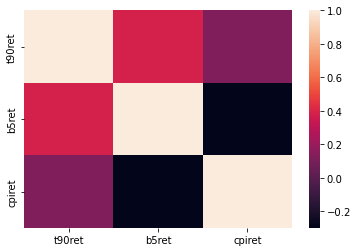

In [7]:
sns.heatmap(treasury_data[['t90ret','b5ret','cpiret']].corr())
treasury_data = treasury_data[['t90ret','b5ret','cpiret']]
treasury_data.head()

In [8]:
VIF(treasury_data)

const     5.743213
t90ret    1.261996
b5ret     1.365417
cpiret    1.181339
dtype: float64

## Market Indicators

In [9]:
index_df = pd.read_csv('index_prices/index_prices.csv')
index_df.datadate = pd.to_datetime(index_df.datadate)
index_df.set_index('datadate', inplace= True)
index_df.head()

,gvkeyx,bkvlps,cshtrm,dvpsxm,dvrate,epsx12,prccm,prchm,prclm,conm,indextype,tic,spii,spmi,indexcat
datadate,,,,,,,,,,,,,,,
1990-01-31,3,NaN,NaN,0.92,11.40,22.869,329.0798,360.5898,319.8298,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-02-28,3,NaN,NaN,0.92,11.40,22.869,331.8899,336.0898,322.0999,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-03-31,3,NaN,NaN,0.92,11.04,21.670,339.9400,343.5300,332.7400,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-04-30,3,NaN,NaN,1.07,11.04,21.670,330.7998,347.2998,327.7598,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-05-31,3,NaN,NaN,1.07,11.04,21.670,361.2300,362.2598,330.7998,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P


In [10]:
# Only interested in the close price
index_data = index_df[['tic','prccm']]
index_data

,tic,prccm
datadate,,
1990-01-31,I0003,329.0798
1990-02-28,I0003,331.8899
1990-03-31,I0003,339.9400
1990-04-30,I0003,330.7998
1990-05-31,I0003,361.2300
...,...,...
2021-09-30,AHD.I,506.6692
2021-10-31,AHD.I,519.2445
2021-11-30,AHD.I,529.0903


In [11]:
from scipy.stats.mstats import gmean

def annual_returns(close_price):
    close_price.fillna(close_price.mean(), inplace = True) # filling Nan's with mean
    return gmean(close_price.pct_change()[1:] + 1) -1 # geometric mean of returns...for annualising

In [12]:
index_data.groupby(['tic'])['prccm'].resample('A').agg(annual_returns).unstack().T

tic,AHD.I,CI0775,CI1040,CI1311,I0003
datadate,,,,,
1990-12-31,NaN,-0.005401,-0.027032,-0.005709,0.000314
1991-12-31,NaN,0.024472,0.001774,-0.013178,0.017688
1992-12-31,NaN,-0.004126,0.005056,0.003941,0.005815
1993-12-31,NaN,0.008754,0.068482,0.024744,0.005575
1994-12-31,0.000000,-0.009898,-0.010919,-0.010245,-0.004309
1995-12-31,0.014851,0.022064,0.019097,0.017911,0.024803
1996-12-31,0.000125,0.010246,-0.005868,0.028377,0.013953
1997-12-31,0.018264,0.001792,-0.045402,-0.003439,0.019328
1998-12-31,0.002091,0.011623,-0.012651,-0.028258,0.020786


In [13]:
index_df[['tic','conm']].drop_duplicates()

,tic,conm
datadate,,
1990-01-31,I0003,S&P 500 Comp-Ltd
1990-01-31,CI1040,S&P/TSX-Gold/Precious Minrls
1990-01-31,CI1311,S&P/TSX-Oil And Gas
1990-01-31,CI0775,S&P/TSX-Consumer Products
1992-12-31,AHD.I,SP500 Household Durables .I


Since only S&P500 and S&P500 Household Durables have recent data, we consider only these market indicators

In [14]:
index_data = index_data.groupby(['tic'])['prccm'].resample('A').agg(annual_returns).unstack().T
index_data = index_data[['I0003','AHD.I']].dropna()
index_data.index = index_data.index.year
index_data.rename({'I0003':'SNP500', "AHD.I":'SNP500_CD'}, axis=1, inplace= True)
index_data

tic,SNP500,SNP500_CD
datadate,,
1994,-0.004309,0.000000
1995,0.024803,0.014851
1996,0.013953,0.000125
1997,0.019328,0.018264
1998,0.020786,0.002091
1999,0.012640,-0.015632
2000,-0.004957,-0.002144
2001,-0.015676,0.012427
2002,-0.022509,-0.003884


In [15]:
VIF(index_data)

const        1.257477
SNP500       1.910425
SNP500_CD    1.910425
dtype: float64

## Market Data

In [16]:
treasury_data.join(index_data).to_csv('market_data.csv')
treasury_data.join(index_data)

,t90ret,b5ret,cpiret,SNP500,SNP500_CD
caldt,,,,,
2001,0.044809,0.082663,0.015517,-0.015676,0.012427
2002,0.017951,0.131414,0.023769,-0.022509,-0.003884
2003,0.011604,0.028316,0.018794,0.024097,0.029007
2004,0.013080,0.023355,0.032557,0.006291,0.016300
2005,0.030790,0.006416,0.034156,0.005029,0.007722
2006,0.048354,0.027717,0.025408,0.009365,-0.007227
2007,0.050863,0.101754,0.040814,0.001886,-0.036031
2008,0.020446,0.131459,0.000915,-0.037706,-0.054795
2009,0.002232,-0.024693,0.027213,0.027671,0.044671


# Merging Market Data with Fundamentals Data

In [17]:
data = comp_data.join(treasury_data.join(index_data))
data.to_csv('merged_data_final.csv')
data.drop(['gvkey'], axis = 1,inplace= True)
data

,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,ebit,...,pi,txpd,prev_ni,prev2_ni,prev3_ni,t90ret,b5ret,cpiret,SNP500,SNP500_CD
2003,2.0,100.0,15.0,280.0,15.0,3.0,11.0,0.0,9.0,1.0,...,4.0,-4.0,-1.0,6.0,-3.0,0.011604,0.028316,0.018794,0.024097,0.029007
2003,0.0,6.0,1.0,6.0,0.0,-1.0,1.0,0.0,0.0,-2.0,...,-2.0,0.0,-1.0,0.0,1.0,0.011604,0.028316,0.018794,0.024097,0.029007
2003,-73.0,1715.0,321.0,3602.0,345.0,143.0,91.0,583.0,45.0,246.0,...,201.0,85.0,135.0,78.0,81.0,0.011604,0.028316,0.018794,0.024097,0.029007
2003,-1.0,32.0,4.0,57.0,0.0,1.0,9.0,30.0,0.0,8.0,...,2.0,-2.0,2.0,27.0,-74.0,0.011604,0.028316,0.018794,0.024097,0.029007
2003,0.0,121.0,19.0,218.0,14.0,-9.0,11.0,76.0,0.0,20.0,...,-3.0,-2.0,-25.0,-4.0,-9.0,0.011604,0.028316,0.018794,0.024097,0.029007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,-2.0,80.0,6.0,119.0,31.0,20.0,33.0,0.0,13.0,25.0,...,24.0,4.0,19.0,28.0,28.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,-567.0,3408.0,948.0,7698.0,909.0,-25.0,352.0,4099.0,213.0,824.0,...,-184.0,116.0,-76.0,600.0,553.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,-225.0,1807.0,79.0,3281.0,1093.0,637.0,130.0,611.0,0.0,889.0,...,897.0,305.0,645.0,483.0,258.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,0.0,218.0,20.0,535.0,49.0,16.0,33.0,113.0,0.0,30.0,...,20.0,6.0,16.0,20.0,7.0,0.006920,0.073770,0.013621,0.013940,0.010226


The top 10 most correlated features with "ni" are:


pi          0.707507
citotal     0.695166
ebit        0.682927
prev_ni     0.672711
dvt         0.586135
txpd        0.566000
ebitda      0.559611
prev2_ni    0.532728
prev3_ni    0.513553
txt         0.449260
Name: ni, dtype: float64

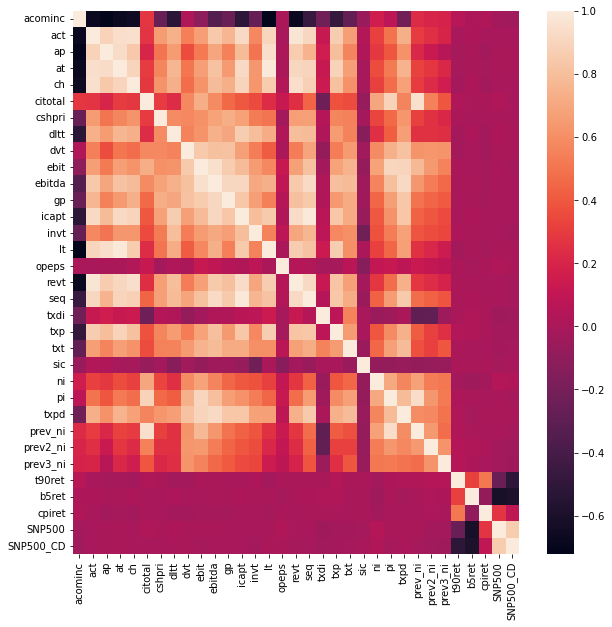

In [18]:
plt.gcf().set_size_inches(10, 10,  forward=True)
sns.heatmap(data.corr())
print('The top 10 most correlated features with "ni" are:')
abs(data.corr()['ni']).sort_values(ascending = False)[1:11]

In [19]:
# VIF(data[['acominc', 'act', 'ap', 'at', 'ch','citotal', 'cshpri', 'dltt', 'dvt', 'ebit', 'ebitda', 'gp', 'icapt','invt', 'lt', 'opeps', 'revt', 'seq', 'txdi', 'txp', 'txt', 'sic','ni','pi','txpd', 'prev_ni', 'prev2_ni',
#        'prev3_ni', 't90ret', 'b5ret', 'cpiret', 'SNP500', 'SNP500_CD']]).sort_values(ascending= False)
VIF(data[['ap', 'at', 'ch', 'cshpri', 'dltt', 'dvt', 'ebit', 'ebitda', 'gp', 'icapt','invt', 'lt', 'opeps', 'revt', 'seq', 'txdi', 'txp', 'txt', 'sic','ni','pi', 'prev_ni', 'prev2_ni',
       'prev3_ni', 't90ret', 'b5ret', 'cpiret', 'SNP500', 'SNP500_CD']]).sort_values(ascending= False)

at           7.191841e+08
lt           3.823956e+08
icapt        1.057462e+08
dltt         6.300055e+06
pi           5.723799e+02
seq          4.351794e+02
prev_ni      3.566020e+02
ebitda       1.123582e+02
txt          8.387909e+01
ebit         7.093328e+01
revt         4.522206e+01
gp           3.264890e+01
ap           1.683387e+01
ch           1.497426e+01
const        1.457527e+01
dvt          7.389003e+00
txp          6.115848e+00
invt         6.092218e+00
SNP500_CD    5.986622e+00
txdi         5.609809e+00
SNP500       5.115762e+00
ni           2.988024e+00
prev2_ni     2.709988e+00
t90ret       2.632019e+00
prev3_ni     2.377347e+00
cshpri       2.348069e+00
cpiret       1.817916e+00
b5ret        1.700889e+00
opeps        1.149975e+00
sic          1.138913e+00
dtype: float64

Clearly most if the features are highly correlated with each other.

Running an OLS over all of them is not a wise decision.

Let us run an OLS over just the past _ni(s)_

# Ordinary Least Squares

In [20]:
import statsmodels.api as sm
from patsy import dmatrices

from sklearn.model_selection import train_test_split
from typing import Union

from sklearn.metrics import r2_score

class OLS:
    def __init__(self, formula: str, data: pd.DataFrame):
        print(formula)
        self.y, self.X = dmatrices(formula, data=data.reset_index(), return_type='dataframe')
        self.val_split = None
        return
    
    def train(self, validation_split: Union[None,float] = None):
        self.val_split = validation_split
        if validation_split:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=validation_split, random_state=42)
            self.model = sm.OLS(self.y_train,self.X_train)
        else:
            self.model = sm.OLS(self.y, self.X)
        self.result = self.model.fit()
        return self.result.summary()

    def rmse(self, precision:int = 4):
        if self.val_split is not None:
            return np.round(np.sqrt(np.mean((np.array(self.y_test.T - self.result.predict(self.X_test)).flatten())**2)), precision)
        else:
            return np.round(np.sqrt(np.mean((np.array(self.y.T - self.result.predict(self.X)).flatten())**2)), precision)

    def r2_score(self, precision: int = 4):
        if self.val_split is not None:
            return round(r2_score(self.y_test, self.result.predict(self.X_test)), precision)
        else:
            return round(r2_score(self.y, self.result.predict(self.X)), precision)
        

## Predicting NI from Past NI(s)

In [21]:
model_prev_nis = OLS(formula='ni ~ prev_ni+prev2_ni+prev3_ni', data=data)
print(model_prev_nis.train())
print(f'\nRMSE is: {model_prev_nis.rmse()}')

ni ~ prev_ni+prev2_ni+prev3_ni
                            OLS Regression Results                            
Dep. Variable:                     ni   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     679.5
Date:                Sun, 13 Feb 2022   Prob (F-statistic):          4.46e-305
Time:                        18:41:59   Log-Likelihood:                -15667.
No. Observations:                2017   AIC:                         3.134e+04
Df Residuals:                    2013   BIC:                         3.136e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4592

We observe that the prev-ni and prev3_ni are significant in determining the future ni.

Prev2_ni is insignificant

<AxesSubplot:>

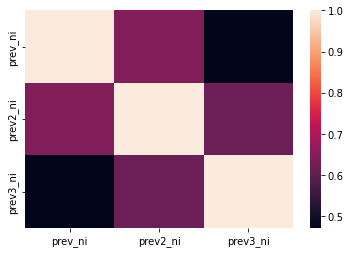

In [22]:
sns.heatmap(data[['prev_ni',"prev2_ni","prev3_ni"]].corr())

This can be explained by the fact that while *prev_ni* and *prev3_ni* have a very low correlation, *prev2_ni* has a high correlation with both.

Thus, it doesn't add any _'new information"_ to the OLS, hence is insignificant

## Step Wise Regression

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# data = load_boston()
# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = data.target


def stepwise_selection(X, y, 
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X = data.drop(['ni'], axis = 1), y= data['ni'])

print('resulting features:')
print(result)

Add  pi                             with p-value 4.13679e-306
Add  prev3_ni                       with p-value 7.72223e-29
Add  citotal                        with p-value 3.3452e-31
Add  ebit                           with p-value 2.76966e-21
Add  gp                             with p-value 2.39768e-22
Add  prev_ni                        with p-value 3.5281e-14
Drop pi                             with p-value 0.926996
Add  dltt                           with p-value 1.89934e-08
Add  ap                             with p-value 1.92676e-11
Add  ebitda                         with p-value 3.9198e-26
Drop gp                             with p-value 0.0610428
Add  ch                             with p-value 4.7857e-06
Add  acominc                        with p-value 3.52454e-08
Add  lt                             with p-value 5.3137e-08
Add  at                             with p-value 4.47718e-10
Add  seq                            with p-value 8.14257e-15
Add  txp                         

In [24]:
model_step = OLS(formula=f'ni ~ {"+".join(result)}', data=data)
print(model_step.train(validation_split= 0.2))
print(f'Test Set R2 is:{model_step.r2_score()}')
print(f'\nRMSE:{model_step.rmse()}')

ni ~ prev3_ni+citotal+ebit+prev_ni+dltt+ap+ebitda+ch+acominc+lt+at+seq+txp+cshpri+invt+t90ret
                            OLS Regression Results                            
Dep. Variable:                     ni   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     188.5
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:42:02   Log-Likelihood:                -12188.
No. Observations:                1613   AIC:                         2.441e+04
Df Residuals:                    1596   BIC:                         2.450e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

## PCA

In [25]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()

pca_data_input = sscaler.fit_transform(data[result])
pca_data_input = pd.DataFrame(pca_data_input, columns = data[result].columns)
pca_data_input['ni'] = data['ni'].reset_index(drop = True)

# pca_data_input = sscaler.fit_transform(data[['ni']+result])
# pca_data_input = pd.DataFrame(pca_data_input, columns = data[['ni']+result].columns)
pca_data_input

,prev3_ni,citotal,ebit,prev_ni,dltt,ap,ebitda,ch,acominc,lt,at,seq,txp,cshpri,invt,t90ret,ni
0,-0.191644,-0.171139,-0.338323,-0.196017,-0.452703,-0.224128,-0.339298,-0.300329,0.152194,-0.236185,-0.261983,-0.302541,-0.238175,-0.295861,-0.412931,-0.114889,8.0
1,-0.185265,-0.176216,-0.341672,-0.196017,-0.452703,-0.231006,-0.350587,-0.310815,0.149513,-0.241282,-0.279246,-0.351251,-0.246464,-0.319130,-0.428438,-0.114889,0.0
2,-0.057673,0.006537,-0.064802,-0.012448,-0.060235,-0.073789,-0.028852,-0.069638,0.051677,-0.044461,-0.052691,-0.053801,-0.246464,-0.109707,-0.128472,-0.114889,269.0
3,-0.304882,-0.173677,-0.330508,-0.191967,-0.432507,-0.229532,-0.341717,-0.310815,0.148173,-0.237740,-0.276033,-0.348771,-0.246464,-0.300515,-0.423107,-0.114889,3.0
4,-0.201214,-0.186369,-0.317111,-0.228411,-0.401541,-0.222163,-0.321558,-0.301028,0.149513,-0.230828,-0.265889,-0.330730,-0.246464,-0.295861,-0.406631,-0.114889,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,-0.142202,-0.149564,-0.311529,-0.169021,-0.452703,-0.228549,-0.327203,-0.289144,0.146833,-0.238431,-0.272127,-0.333210,-0.246464,-0.244669,-0.410023,-0.420964,29.0
2013,0.695120,-0.206674,0.580483,-0.297249,2.306692,0.234259,0.421901,0.324634,-0.610391,0.353415,0.205365,-0.168812,-0.246464,0.497621,0.292159,-0.420964,77.0
2014,0.224625,0.633480,0.653049,0.675935,-0.041385,-0.192684,0.498504,0.453262,-0.152036,-0.126542,-0.072915,0.088046,-0.030956,-0.018957,-0.179355,-0.420964,588.0
2015,-0.175695,-0.154641,-0.305947,-0.173070,-0.376633,-0.221671,-0.305431,-0.276561,0.149513,-0.224002,-0.245918,-0.283823,-0.229887,-0.244669,-0.370771,-0.420964,8.0


In [26]:
from sklearn.decomposition import PCA

pca = PCA()
transformed = pca.fit_transform(pca_data_input.drop('ni',axis=1))

num_components = 8

print(f'\n Explanied Variance is ≈{round(pca.explained_variance_ratio_.cumsum()[num_components-1], 2)}% from the first {num_components}/{transformed.shape[1]} predictors itself!')
print(pca.explained_variance_ratio_.cumsum()[:num_components])

pca_data = pd.DataFrame(transformed[:,:num_components],
                    columns=[f'prin{i+1}' for i in range(num_components)])
pca_data['ni'] = pca_data_input['ni']
pca_data


 Explanied Variance is ≈0.96% from the first 8/16 predictors itself!
[0.57220346 0.74292231 0.80556503 0.86010619 0.90097398 0.93320026
 0.94991285 0.96232654]


,prin1,prin2,prin3,prin4,prin5,prin6,prin7,prin8,ni
0,-1.073600,0.105356,-0.113470,0.212366,-0.072736,0.095099,0.074023,0.040510,8.0
1,-1.116627,0.103916,-0.114127,0.219701,-0.089563,0.087315,0.058581,0.024399,0.0
2,-0.277639,-0.026905,-0.130252,0.046052,-0.007061,-0.034894,-0.113695,0.013318,269.0
3,-1.109319,0.140900,-0.121667,0.255881,0.010742,0.057408,0.061238,0.034584,3.0
4,-1.066055,0.128219,-0.113403,0.180071,-0.062067,0.079096,0.057125,0.023679,7.0
...,...,...,...,...,...,...,...,...,...
2012,-1.048549,0.070127,-0.419674,0.175374,-0.089455,0.140298,0.059609,0.018790,29.0
2013,1.417015,0.438057,-0.403008,-1.416120,-0.117384,-0.333336,-1.096285,-0.900101,77.0
2014,0.589212,-0.844327,-0.519077,0.359868,-0.037796,0.075318,-0.556164,0.474040,588.0
2015,-0.977030,0.095358,-0.419159,0.146051,-0.057893,0.090034,0.073907,0.018559,8.0


,prin1,prin2,prin3,prin4,prin5,prin6,prin7,prin8,prin9,prin10,prin11,prin12,prin13,prin14,prin15,prin16
prev3_ni,0.36,-0.57,0.06,-0.37,-0.59,0.20,-0.05,-0.07,-0.09,0.03,0.00,-0.02,0.01,-0.00,0.00,0.00
citotal,0.49,-0.75,-0.05,0.35,0.12,-0.11,-0.07,-0.08,-0.09,0.04,0.04,0.02,0.13,0.01,0.00,0.00
ebit,0.84,-0.46,-0.04,-0.01,0.01,0.04,-0.08,0.10,0.18,-0.13,-0.04,-0.05,0.01,0.05,-0.05,-0.00
prev_ni,0.52,-0.76,-0.06,0.30,0.04,-0.09,-0.10,-0.03,-0.05,0.08,-0.08,0.00,-0.13,-0.03,0.00,-0.00
dltt,0.83,0.15,-0.01,-0.34,0.10,-0.25,-0.12,-0.18,0.16,0.12,0.14,-0.01,-0.01,-0.02,-0.01,0.00
ap,0.84,0.38,0.01,0.24,-0.07,0.02,0.01,-0.15,-0.07,-0.19,0.04,-0.10,-0.01,-0.09,-0.01,-0.00
ebitda,0.94,-0.22,-0.02,-0.03,0.01,0.07,-0.06,0.13,0.16,-0.09,0.01,-0.01,0.01,-0.01,0.07,0.00
ch,0.90,0.25,-0.00,0.05,0.04,0.04,-0.03,0.19,-0.18,0.09,0.16,-0.11,-0.02,0.05,-0.00,-0.00
acominc,-0.52,-0.75,0.01,-0.07,0.11,0.02,0.31,-0.06,0.03,-0.08,0.17,-0.01,-0.04,0.02,0.00,-0.00
lt,0.89,0.34,0.01,0.19,-0.14,-0.01,0.05,-0.14,0.00,-0.04,-0.01,0.07,-0.02,0.09,0.01,-0.01


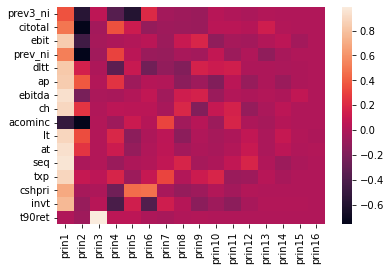

In [27]:
# # cov_matrix = pd.DataFrame(pca.get_covariance(), index=pca.feature_names_in_, columns= pca.feature_names_in_)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings = np.round(pd.DataFrame(loadings, columns = [f'prin{i+1}' for i in range(transformed.shape[1])], index= pca.feature_names_in_), 2)

sns.heatmap(loadings)
loadings

In [28]:
model_pca = OLS(formula=f'ni ~ {"+".join(pca_data.drop("ni", axis = 1).columns)}', data=pca_data)
# print(model_pca.train())
print(model_pca.train(validation_split= 0.2))
print(f'Test Set R2 is:{model_pca.r2_score()}')
print(f'\nRMSE:{model_pca.rmse()}')

ni ~ prin1+prin2+prin3+prin4+prin5+prin6+prin7+prin8
                            OLS Regression Results                            
Dep. Variable:                     ni   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     231.8
Date:                Sun, 13 Feb 2022   Prob (F-statistic):          3.29e-261
Time:                        18:42:03   Log-Likelihood:                -12424.
No. Observations:                1613   AIC:                         2.487e+04
Df Residuals:                    1604   BIC:                         2.491e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

## Partial Least Squares Regression

In [29]:
from sklearn.cross_decomposition import PLSRegression

plsr_model = PLSRegression(n_components= 5, scale= True, copy= True)

X = data.drop(['ni'], axis = 1)
y = data['ni']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plsr_model.fit_transform(X_train, y_train)

plsr_model.score(X_test,y_test)

0.6063073937317388

In [30]:
X,Y = plsr_model.transform(X,y)

# Regression Splines

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pyearth

In [32]:
# X = data.drop(['ni'], axis = 1)
# X = data.drop(['ni','gvkey'], axis = 1)
# y = data['ni']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
r2 = {}
for degree in range(5):
    mars = pyearth.Earth(max_terms=500*degree, max_degree= degree) # note, terms in brackets are the hyperparameters 
    mars.fit_transform(X_train, y_train)
    r2[degree] = mars.score(X_test,-y_test)

In [39]:
pd.Series(r2)

0    -0.168461
1    -2.721355
2    -5.150817
3   -38.053688
4   -32.460859
dtype: float64

Conclusion: MARS is shitty.
Needs more work

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingClassifier
from numpy import arange

# X = data.drop(['ni'], axis = 1) 
# y= data['ni']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### Random Forest without PCA Transform


In [23]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'max_depth': max_depth,
               'bootstrap': bootstrap,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}



rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=7, n_jobs = -1)
rf_random.fit(X_train, y_train)


y_pred = rf_random.predict(X_test)
print('RMSE equals ', sqrt(mean_squared_error(y_pred, y_test)))
print('R-square equals ', r2_score(y_test, y_pred))

RMSE equals  621.628962472722
R-square equals  0.3148696044734324


#### Gradient Boosting without PCA Transform

In [24]:
learning_rate = arange(0, 1, 0.1)
n_estimators = [x for x in range(0,50,10)]
max_depth = [1,2,3,4]

random_grid = {'learning_rate': learning_rate,
               'n_estimators': n_estimators,
               'max_depth': max_depth}



gb = GradientBoostingClassifier()
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, cv = 3, random_state=9, n_jobs = -1)
gb_random.fit(X_train, y_train)


y_pred = gb_random.predict(X_test)
print('RMSE equals ', sqrt(mean_squared_error(y_pred, y_test)))
print('R-square equals ', r2_score(y_test, y_pred))

# With PCA

## Partial Least Squares Regression

In [38]:
from sklearn.cross_decomposition import PLSRegression

plsr_model = PLSRegression(n_components= 5, scale= True, copy= True)

X = pca_data.drop(['ni'], axis = 1)[:]
y = pca_data['ni']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plsr_model.fit_transform(X_train, y_train)

plsr_model.score(X_test,y_test)

0.548056645720457

# Regression Splines

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pyearth

In [40]:
r2 = {}
for degree in range(5):
    mars = pyearth.Earth(max_terms=500, max_degree= degree) # note, terms in brackets are the hyperparameters 
    mars.fit_transform(X_train, y_train)
    r2[degree] = mars.score(X_test,y_test)

In [41]:
pd.Series(r2)

0    -0.001193
1     0.500139
2     0.302696
3     0.151240
4   -13.213297
dtype: float64

Conclusion: MARS is shitty.
Needs more work

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingClassifier
from numpy import arange

# X = data.drop(['ni'], axis = 1) 
# y= data['ni']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### Random Forest without PCA Transform


In [44]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'max_depth': max_depth,
               'bootstrap': bootstrap,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}



rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=7, n_jobs = -1)
rf_random.fit(X_train, y_train)


y_pred = rf_random.predict(X_test)
print('RMSE equals ', sqrt(mean_squared_error(y_pred, y_test)))
print('R-square equals ', r2_score(y_test, y_pred))

RMSE equals  656.811677931979
R-square equals  0.5439229294889517


#### Gradient Boosting without PCA Transform

In [45]:
learning_rate = arange(0, 1, 0.1)
n_estimators = [x for x in range(0,50,10)]
max_depth = [1,2,3,4]

random_grid = {'learning_rate': learning_rate,
               'n_estimators': n_estimators,
               'max_depth': max_depth}



gb = GradientBoostingClassifier()
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, cv = 3, random_state=9, n_jobs = -1)
gb_random.fit(X_train, y_train)


y_pred = gb_random.predict(X_test)
print('RMSE equals ', sqrt(mean_squared_error(y_pred, y_test)))
print('R-square equals ', r2_score(y_test, y_pred))

KeyboardInterrupt: 

***